# Content
 - what are Decision Trees
 - when these are useful
 - How to train, Visualize and make Predication 
 - Regularize Decision Trees
 - Different techinques Like CART algo


**Decision Tree** 
- Its a machine learning algorithm that can perform both Regression and Classification, plus multioutput tasks too
- Capable of fitting complex datasets
- It divide data into subsets through series of yes/no question or multiway split(continious).
- **Explainiablity** when interpretability is crucial, decision Trees are used since its provide visual and intutive understanding

## ----

**Most Common Algos For Decision Tree**

- **ID3 (Iterative Dichotomiser 3)** uses **Information Gain** to decide which feature to split on at each step
   - it can be used only in classification
- **CART (Classification and Regressioin Tree** uses **Gini Index** for classification and **Mean Square Error** for regression trees
   - as name says it can be used in both regression and classification
- **C4.5** - Extension of ID3, also handles missing values. Its uses **Gain Ratio** instead of information gain for better splits
   - it can handle both regression and classification 
- **CHAID (Chi Squared Automatic Interaction Detection)** - uses **CHI-Squared Test** to find the best spilit
   - it can both regression and classification. But Generally used for classification


## ----
**Most Common Advanced Tree based Models**
- **Random Forest**: An ensemble method that builds multiple decision trees and averages their predictions to improve performance and robustness.
- **Gradient Boosting Machines (GBM)**: Build trees sequentially, with each tree trying to correct the errors of the previous ones.
- **XGBoost/Light GBM/CatBoost** : Efficient implementations of gradient boosting algorithms, often used in competitive machine learning
   
   



# 1. Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values

y_iris = iris.target
print(len(X_iris))

150


In [2]:
#Initialize tree classifier

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)  # X and y are here ndimension array

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
## installing package via pip install graphviz was not working, conda install its images are rendering now in jupyter notebook
# conda remove graphviz
# conda install python-graphviz

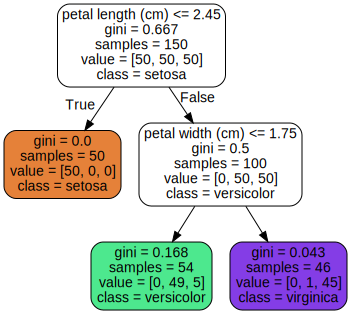

In [4]:
# we cab visualize the tree using export_graphviz() 
# by saving the pic with iris_tree_dot


from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file = 'iris_tree.dot',
               feature_names  = ['petal length (cm)', 'petal width (cm)'],
               class_names = iris.target_names,
                rounded = True,
                filled = True
               )



from graphviz import Source

Source.from_file('iris_tree.dot')

# graphviz is open source graph visualizaton software package
# it also include a dot command-line tool to convert .dot files to a variety formats such as pdf, png

**Decision Tree require very little data prep. In fact you don't require feature scalling or centering at all**

**DecisionTreeClassifier user CART Algorthim**

**Gini Impurity  ---**

- its a meteric to measure how pure is a node
- its value lie in range of 0 to 0.5
- 0 means **Pure Node** 
   - If all the instance belongs to the same class
   - gini impurity value is zero
- **Maximal Impurity** 
   - for binary classification maximal impurity or gini impurity index - 0.5
   - 50% of one class and 50% of another class
   - Indicating those nodes as highly impure
   
- Gini impurity index formula 
   - gini = 1 - ∑(from i=1 to n) p<sup>2<sup>
   - for binary classification gini = 2*p(1-p)
      - p_i : randomly selected class belonnging to class i
   - let calculate gini index , from above example 
      - organge color node Gini impurity index = '1 - (50/50)**2 -(0/50)**2 - (0/50)**2' = **0** Pure Node, gini impurity index 0
      - green color node Gini impurity index = '1 - (0/54)**2 - (49/54)**2 - (5/54)**2' = **0.168**, near to zero value, good classification
    
# ----



In [5]:
1 - (0/54)**2 - (49/54)**2 - (5/54)**2


0.1680384087791495

# 2. Making Predications

In [6]:
# will help in finding attributes for the tree
# help(tree_clf.tree_)

In [7]:
print(tree_clf.tree_.node_count, '\n',
     
     tree_clf.tree_.max_depth)

5 
 2


- Decision trees are intuitive, and their decisions are easy to interpret. 
   - these models are often called **white box models**. 
- In contrast, random forests and neural networks are generally considered **black box models**
   - because they are difficult to explain

## 2.1 Estimating Class Probabilities

- A decision Tree can also estimate the probability that an instance belong to a particular class k.
- The decision tree first traverses from the root to a leaf node based on the input sample’s feature values and the splitting rules defined at each node.
- At the leaf node, it calculates the class probabilities based on the class distribution of the training samples in that node.

   - example for above tree, new obs petal length 5 cm, petal width 1.5 cm
   - from traversing from root node, it will come to green leaf node (3rd node)
   - in training data for this green leaf node , there are total 54 instances, out of which
      - 0 are setosa therefore for new obs given above, being setosa is 0%
      - 49 are versicolor, then its 49/54 i.e. 90.7% chance being versiocolor
      - similariy 9.3% chance for virginica (5/54)
      
      


In [8]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [9]:
tree_clf.predict([[5,1.5]])

array([1])

# 3. CART Training Algorithm

**CART**: Classification and Regression Tree
  - CART, a decision tree model, as name says, it can do both Classification and Regression
  - it works by continously creating subsets in two group, based on feature values, aiming to create most homogenous set(pure) in terms of class and labels at each step
  - CART builds binary decision treee using greedy approcach to split data based on certain criterion
      - **Gini Impurity**
      - **MSE**
  - **Pros**
    - its suits on smaller datasets and where interpretability is important
    - Its suits when featuers and target variable show non-linear **relationship**
    - Non-parametric: It doesn't assume any specific distribution of the data
    - Can handle both numerical and categorical variables
  - **Cons**
    - biased towards majority class
    - Prone to overfitting

 ## ----
  - CART is greedy algorithm, it greedily searches for an optimum split at the top level, then repaeat the process at each subsequent level
  - **It doesn't check wheter or not the split will lead to the lowest possible impurity (global minimum) several levels down**
  - Finding optimal tree is know to be an **NP complete** problem, it requires O(exp(m)) time, not suitable for smaller dataset.
    - NP-complete is a classification in computational complexity theory that refers to problems that are:

       - NP (Nondeterministic Polynomial time): The solution to the problem can be verified in polynomial time.
       - Complete: As hard as any other problem in NP, meaning that if you could solve one NP-complete problem efficiently, you could solve all NP problems efficiently.
       - example: a large jigsaw puzzle, checking whether all the pieces are placed correctly is quick (just verifying it), but finding the correct arrangement might take a lot of time (trial and error, which could take exponentially long).

 
## ----

**Computional Complexity for CART**
   - O(n*m*log2(m))
       - n : number of instances
       - m : number of features
       - example: number of instance 450, and features 12
          - log2(12) = 3.585
          - O(450 * 12 * 3.585) = O(19359)
          - this means in worst secanrio, roughly 19.3k **Computional steps** will be requried this decision tree
 
  
  

In [10]:
450 * 12 * 3.585


19359.0

## 3.1 Gini Impurity or Entropy

- **Both Gini Impurity and Entropy are metrics, used to evalute the split in Decision tree, aiming to measure the purity of the nodes after the split**
- in DecisionTreeClassifier, Gini Impurity used by default but we can select entropy impurity measure too 


**Gini Impurity** 
  - def: a measure of how often a randomly chosen element would be incorrectly classified if it was randomly labeled according to the distribution of labels in the dataset.
  - Gini  =  1− ∑(from i =1, k) p_i**2
     - p_i : proportion of class i at particular node
     - k: number of classes
     - range : 0 (pure node) to 0.5 (for binary classification when classes are evely split)

**Entropy Impurity**: It quantifies the amount of disorder or randomness in a system, typically used in decision trees (like ID3 or C4.5) to assess how well a dataset is split by a feature

  - High entropy means the data is highly impure or mixed (e.g., equal numbers of different classes).
  - Low entropy means the data is more pure or homogenous (e.g., mostly one class)
     
   - Entropy Formula: (For a binary classification problem)

        - Entropy = -(p_1 * log_2(p_1)) - (p_2 * log_2(p_2))
        - p_1 and p_2 are the proportions of the two classes
        - for multiclass classification, the formula genarlizes to include all class
    - Range: **Entropy values range from 0 (pure node) to log_2(k), where k is the number of classes**. 
        - In binary classification, the maximum entropy is 1**

| **Aspect**       | **Gini Impurity**                                       | **Entropy**                                      |
|------------------|---------------------------------------------------------|--------------------------------------------------|
| **Formula**      | \( 1 - \sum p_i^2 \)                                    | \( - \sum p_i \log_2(p_i) \)                     |
| **Range**        | 0 (pure) to 0.5 (impure for binary classification)      | 0 (pure) to 1 (impure for binary classification) |
| **Computation**  | Slightly faster to compute due to the absence of logs   | Slower to compute due to logarithmic operations   |
| **Preference**   | Tends to create larger trees with simpler splits        | Tends to create smaller trees with more complex splits |
| **Sensitivity**  | Gini tends to be more sensitive to class distributions  | Entropy can slightly prefer more balanced splits  |


# 4 Regularization Hyperparameters

**Parametric and Non Parametric Model**
  - **A non-parametric model** isn't called "non-parametric" because it lacks parameters, but rather because the number of parameters is not fixed prior to training.
  - Instead, the model structure adapts based on the training data, which allows it to capture more complex patterns and relationships.
  - This flexibility allows non-parametric models to:

      - Grow in complexity as more data becomes available.
      - Fit the data more closely because they aren't confined to a predetermined form or structure.
  
  - Examples 
     - k-Nearest Neighbors (k-NN) doesn't have a fixed number of parameters; the number of neighbors k is a hyperparameter, but the structure of the model depends entirely on the data points.
     - Decision Trees continue to add more nodes and splits as they process more data, leading to a model structure that is highly dependent on the specific dataset.
     
     
  - **Parametric models** have a predetermined number of parameters, irrespective of the size or complexity of the dataset.
      - its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

| **Aspect**           | **Parametric Models**                                | **Non-Parametric Models**                              |
|----------------------|------------------------------------------------------|--------------------------------------------------------|
| **Assumptions**       | Strong assumptions about the data distribution       | Few or no assumptions about the data distribution      |
| **Number of Parameters** | Fixed, regardless of data size                       | Grows with the size of the dataset                      |
| **Flexibility**       | Less flexible, prone to underfitting                 | More flexible, can fit complex data                    |
| **Training Time**     | Generally faster to train                            | Slower to train, especially on large datasets          |
| **Risk of Overfitting** | Lower risk of overfitting                           | Higher risk of overfitting                             |
| **Examples**          | Linear regression, logistic regression, Naive Bayes  | k-NN, decision trees, SVM (with kernels), random forests|


- To avoid overfitting the training data in, we need to restrict the decision's tree freedom during training, this is called **regularization**

- The regularization hyperparameters depends on the model/algorithm that used
   - there are many algorithm that can do decision tree, their hyperparameters may change.
      - there are some common hyperparameter, one **max_depth**, default value is none,in scickit learn, ,means unlimeted depth.
      - reducing the depth will regularize the model and thus reduce the risk of overfitting

## ----
- **DecisionTreeClassifier**  other parameters to restrict the shape

   - max_features : max number of features that are evaluated for splitting at each node
   - max_leaf_nodes : max number of leaf nodes
   - min_samples_split : minimum number of samples a node must have before it can be split
   - min_samples_leaf : min number of samples a leaf node must have to be created
   - min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of wieghted instances
      - This parameter is useful when working with imbalanced datasets or when some instances are weighted differently from others.
      
### - Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.
   

All algos, first training the decision tree without restrications, 
 - then pruning (deleting) the unneccessary trees
 - A node whose children are all leaf nodes is considered unneccesary if the purity improvment it provides is not statistically significant
 - Standard Statistical Test, such as Chi_squared test are used to estimate the probability, that the improvment is purely the result of chance(which is called null hypothesis)
    - If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. 
    - The pruning continues until all unnecessary nodes have been pruned.

In [11]:
# Lets do regularization on decision tree example

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)


tree_clf1 = DecisionTreeClassifier(random_state = 42)

tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 42)


In [12]:
tree_clf1.fit(X_moons, y_moons)

DecisionTreeClassifier(random_state=42)

In [13]:
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [14]:
#lets test result with differnt sampling

X_moons_test, y_moons_test = make_moons(n_samples = 1000, noise = 0.2, random_state = 43)

In [15]:
print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.898
0.92


- we need to do cross validation score, one sample may lie, here regularized tree perform better. but not always true

# 5. Regression with Decision Tree

In [16]:
# lets build a regression tree with dt

import numpy as np

from sklearn.tree import DecisionTreeRegressor


np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature 
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [17]:
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state =42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

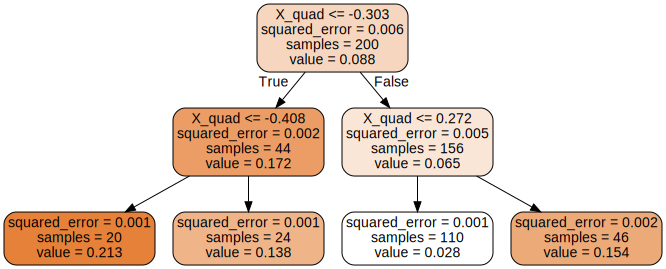

In [18]:
# Step 3: Export the tree to a dot file
export_graphviz(
    tree_reg,
    out_file="tree_reg_ex_1.dot",
    feature_names=['X_quad'],  # The name of the input feature
    rounded=True,
    filled=True
)

# Step 4: Visualize the tree using Graphviz
Source.from_file('tree_reg_ex_1.dot')

- This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. 

- For example, suppose you want to make a prediction for a new instance with x1 = 0.2. 
- The root node asks whether x1 ≤ -0.303. 
   - Since it is not, the algorithm goes to the right child node, 
   - which asks whether x1 ≤ 0.272. 
   - Since it is, the algorithm goes to the left child node. 
   - This is a leaf node, and it predicts value=0.028. 
   - This prediction is the average target value of the 110 training instances associated with this leaf node,
   - and it results in  squared error equal to 0.001 over these 110 instances.


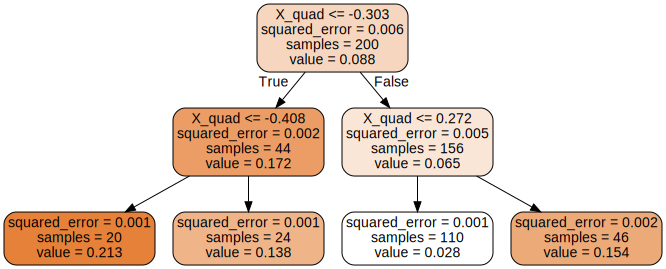

In [19]:
export_graphviz(
    tree_reg,
    out_file="tree_reg_mse.dot",
    feature_names=["X_quad"],
    rounded=True,
    filled=True,
)

# Visualize the tree using Graphviz
Source.from_file("tree_reg_mse.dot")

- **Cost function for CART**
    - Classification Trees: Use Gini impurity or Entropy to determine the best splits based on class distribution.
    - Regression Trees: Use Mean Squared Error to evaluate the quality of splits based on target variable values

# 6. Senstivity to Axis Orientation

- decision trees can be sensitive to the orientation of the data. 
- This sensitivity arises because decision trees make splits based on the feature values along the axes of the feature space. 
- Here are some points to consider regarding changing the orientation of the data to improve decision tree performance:
   - Feature Scaling and Transformation:
   - PCA
   - Feature Engineering:
   - Using Ensemble Methods
   - Using Cross validation
 

In [20]:
# lets build a pipline that scales the data and rotate it using PCA

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pca_pipeline = make_pipeline(StandardScaler(),
                            PCA())

pca_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [21]:
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(random_state = 42, max_depth = 2)

tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# 7. Decision Tree have a high variance

- DT have high variance,
- small changes to the hyperparameters or to the data may produce very different models
- the training algorithm used by Scikit-Learn is stochastic—it randomly selects the set of features to evaluate at each node—even retraining the same decision tree on the exact same data may produce a very different model

## -----

- Luckily, by averaging predictions over many trees, it’s possible to reduce variance significantly. 
- Such an ensemble of trees is called a random forest,

## Happy Learning